# Setup

In [2]:
import cv2 as cv
print("OpenCV-Python Version {}".format(cv.__version__))
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import math
import extract, train
from img_display import roi_display_jup
from tcutil import Labels


OpenCV-Python Version 4.9.0


2024-06-11 12:17:39.941 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-06-11 12:17:40.000 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
# When running in local
folder_path = ""

In [3]:
image_file = "b3_0001.png"
image_path = f"{folder_path}scan_resultsheets/Train/{image_file}"
print(image_path)

scan_resultsheets/Train/b3_0001.png


# Extraction of symbols from the scan picture

## Detection of box coordinates

We use Boxdetection object from extract.py module, which contains all the functions needed to :
* rotate the scan
* detect the boxes
* align and reorder the boxes

2024-06-06 14:11:03.667 
  command:

    streamlit run C:\Program Files\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-06 14:11:03.670 No runtime found, using MemoryCacheStorageManager


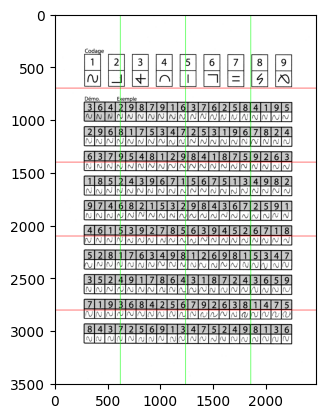

In [4]:
b = extract.Boxdetection(image_path = image_path)
plt.imshow(b.plot_scan(b.img))
plt.show()

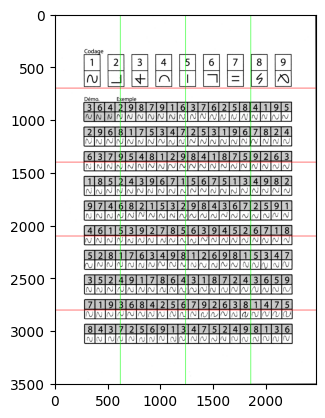

In [6]:
b.image_rotation(0.2)
plt.imshow(b.plot_scan(b.img_rot))

In [7]:
b.extract_boxes_fast()
print(b.box_coord.shape)

(400, 4)


2024-06-06 14:12:12.693 No runtime found, using MemoryCacheStorageManager


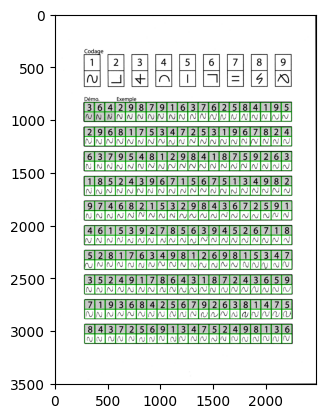

In [8]:
plt.imshow(b.plot_boxes(b.box_coord))

## Extraction of symbols (ROI) located inside the boxes

We use ROIExtract object from extract.py, which contains functions to extract pixels located inside box coordinate and store them in a numpy array.

The size of images to extract, as well as the indexes of box coordinate to use for symbol extraction, are hardcoded in ROIExtract.

We use visualisation function from img_display.py module.

In [9]:
r = extract.ROIExtract(b.img_rot)
r.extract_roi_symbols(b.box_coord)
print(r.roi_symbols.shape)

(200, 76, 82)


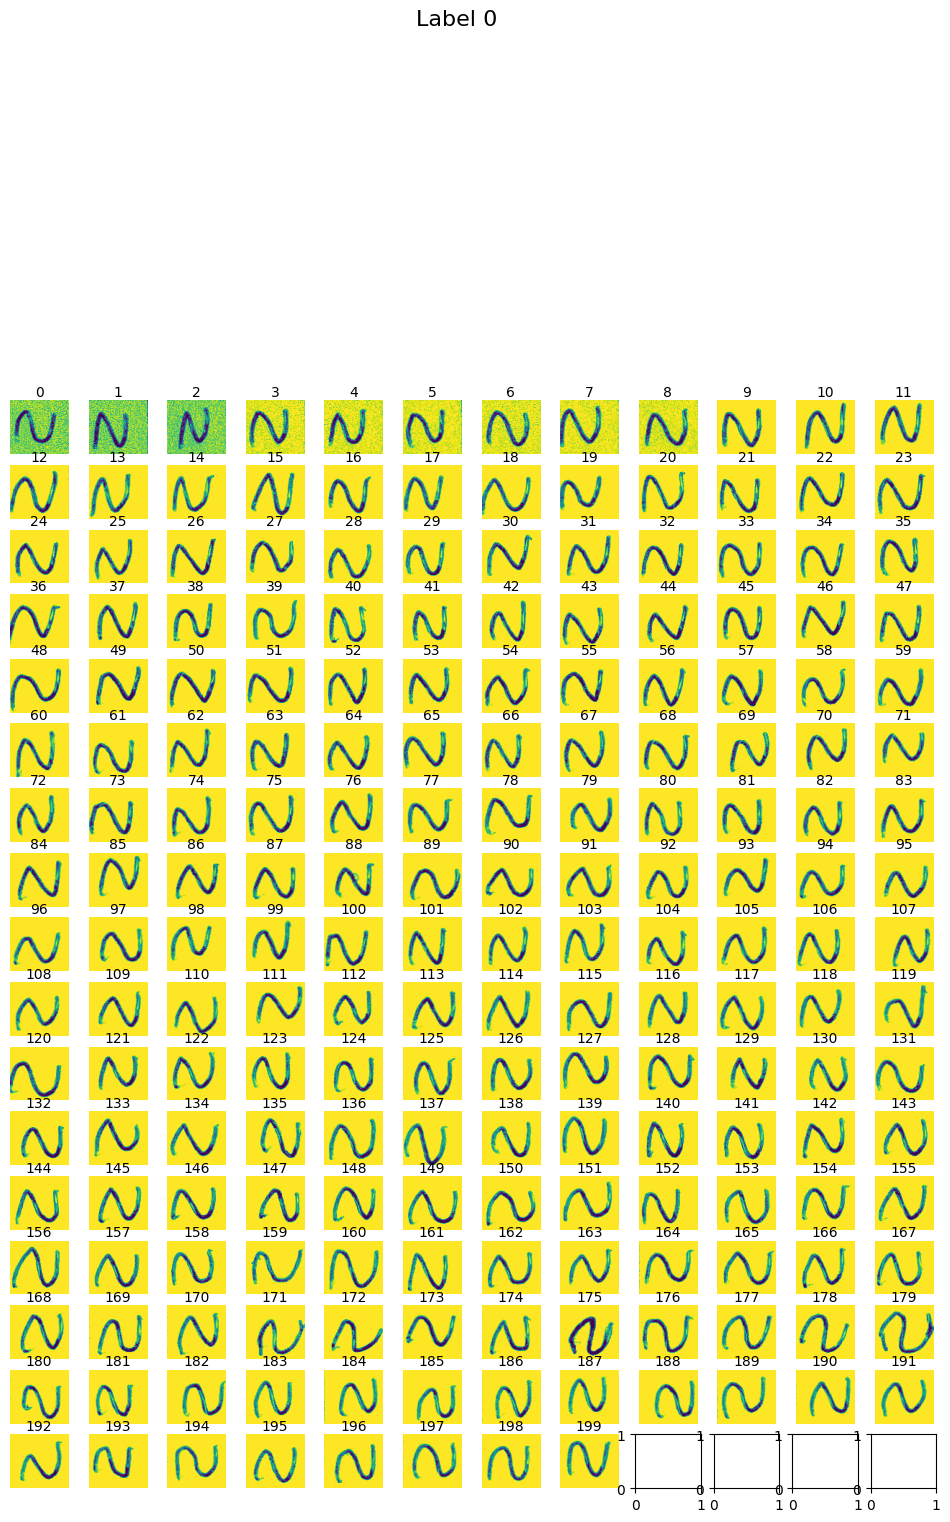

In [13]:
l = Labels()
roi_display_jup(r.roi_symbols, l.labels["blank_labels"])

# Annotation of symbols

To use only for training sheets (monosymbol)

In [15]:
# Extraction of label from file name
train_label = f'{image_file}'
train_label = int(train_label[-5])
l.labels["annot_labels"] = np.full((len(r.roi_symbols),), train_label)
print(l.labels["annot_labels"])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Verification

In [4]:
# For training scanned sheet (monosymboles)
# We remove empty images, or the ones with errors
exemple_index = np.array(range(9))
# If need to exclude additionnal indexes :
add_index = np.array([])
excluded_index = np.hstack((exemple_index, add_index))
keeper_mask = [False if i in excluded_index else True for i in range(0, 200) ]
print(keeper_mask)

[False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, 

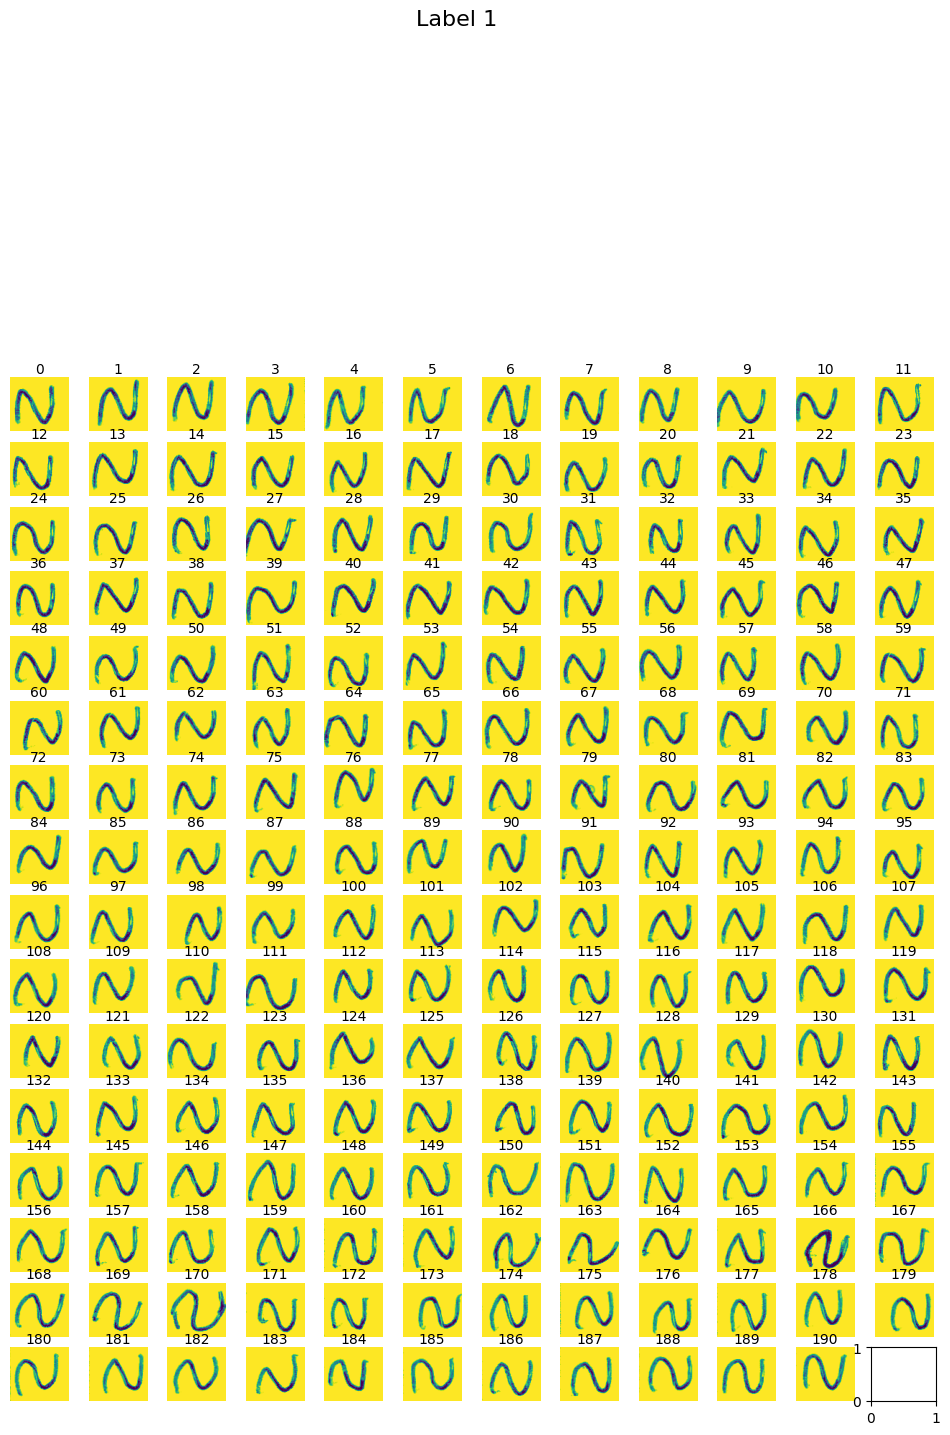

In [28]:
roi_display_jup(r.roi_symbols, l.labels["annot_labels"], keeper_mask)

# Saving data

In [36]:
d = train.Dataset(r.roi_symbols[keeper_index], l.labels["annot_labels"][keeper_index])
print(d.dataset.shape)

(191, 6233)


In [34]:
import importlib

# make changes to example.py file

importlib.reload(train)

<module 'train' from 'C:\\Users\\Utilisateur\\Documents\\Stage\\TREC - Codage\\trec-coding\\train.py'>

In [37]:
d.save_csv(image_file)
print(image_file)

b3_0001.png
